# Plotting Sigmoid Function

In [0]:
import numpy as np
import matplotlib.pyplot as plt

$S_{w,b}{x} = \frac{1}{1+ e^{-{wx+b}}}$

In [0]:
def sigmoid(x,w,b):
    return 1/(1+np.exp(-(w*x+b)))

In [3]:
sigmoid(1,0.5,0)

0.6224593312018546

For every value in **X** the sigmoid function is being called and the values are stored as an array

In [0]:
w = 0.9 #@param {type: "slider", min: -2, max: 2, step:0.1}
b = 0.1 #@param {type: "slider", min: -2, max: 2, step:0.1}
X = np.linspace(-10,10,100) #Equally spaced number between a and b and with c count
Y = sigmoid(X,w,b)

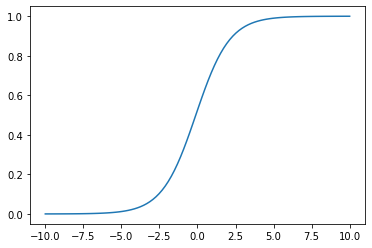

In [9]:
plt.plot(X,Y)
plt.show()

In [0]:
w =-0.9
b = 0.1
X = np.linspace(-10,10,100) #Equally spaced number between a and b and with c count
Y = sigmoid(X,w,b)

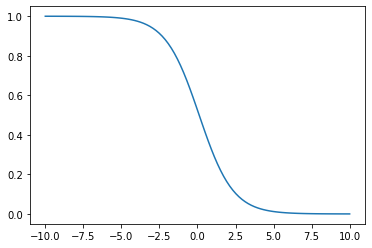

In [7]:
plt.plot(X,Y)
plt.show()

In [0]:
w = 0.9
b = -0.1
X = np.linspace(-10,10,100) #Equally spaced number between a and b and with c count
Y = sigmoid(X,w,b)

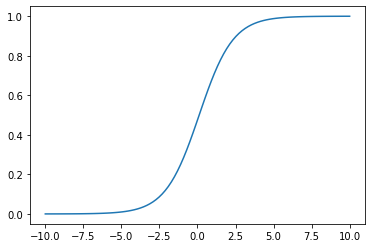

In [11]:
plt.plot(X,Y)
plt.show()

$S_{w_1,w_2}{x_1,x_2} = \frac{1}{1+e^{-(w_1x_1 + w_2x_2 + b)}}$

In [0]:
def sigmoid_2d(x1,x2,w1,w2,b):
  return 1/(1+np.exp(-(w1*x1 + w2*x2 + b)))

In [14]:
sigmoid_2d(1,0,0.5,0,0)

0.6224593312018546

# 3D Plotting in matplotlib
[3D matplotlib](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html)

In [0]:
from mpl_toolkits import mplot3d

In [17]:
X1 = np.linspace(-10,10,100)
X2 = np.linspace(-10,10,80)
#We need a joint grid of all possible combinations
XX1,XX2 = np.meshgrid(X1,X2)
print(X1.shape,X2.shape,XX1.shape,XX2.shape)

(100,) (80,) (80, 100) (80, 100)


In [0]:
w1 = 0.5
w2 = 0.5
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

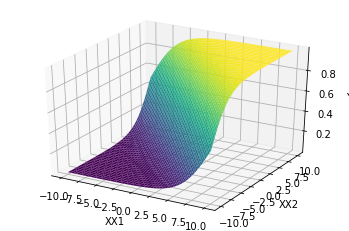

In [24]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('XX1')
ax.set_ylabel('XX2')
ax.set_zlabel('Y');

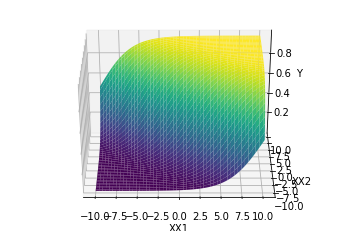

In [31]:
ax.view_init(30,270) #(height you want to view, rotatiom)
fig

# Compute Loss for a Given Dataset (BruteForce)

In [0]:
w_unknown = 0.5
b_unknown = 0
X = np.random.random(25) * 20 - 10
Y = sigmoid(X,w_unknown,b_unknown)

In [54]:
p

(25,)


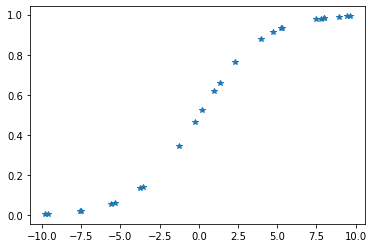

In [33]:
plt.plot(X,Y, "*")
plt.show()

Take different values of w and b, and find the losses


In [0]:
def compute_loss(X,Y,w_est,b_est):
  loss = 0
  for x,y in zip(X,Y):
    loss += (y-sigmoid(x, w_est,b_est))**2
  return loss

In [0]:
W = np.linspace(0,2,100)
B = np.linspace(0,1,100)

WW, BB = np.meshgrid(W,B)

Loss = np.zeros(WW.shape)

In [57]:
print(Loss[0,0])

0.0


In [0]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i,j] = compute_loss(X,Y,WW[i,j],BB[i,j])

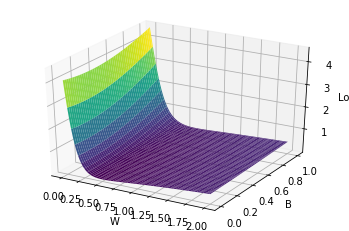

In [62]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('W')
ax.set_ylabel('B')
ax.set_zlabel('Loss');

Now we want to find w and b which minimizes the loss.
Since its not clear we go back and change the value of weights and b.


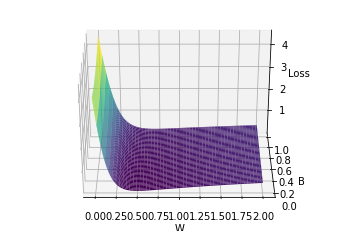

In [64]:
ax.view_init(30,270)
fig

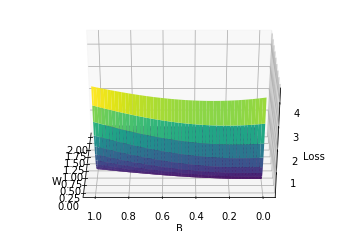

In [65]:
ax.view_init(30,180)
fig

We can use ***np.argmin*** to get cordinate of the minimum value.
It stacks up Loss's columns so you have to compute.

In [0]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i * Loss.shape[1])

In [70]:
print(i,j)

0 25


In [71]:
print(WW[i, j],BB[i,j])

0.5050505050505051 0.0
